Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

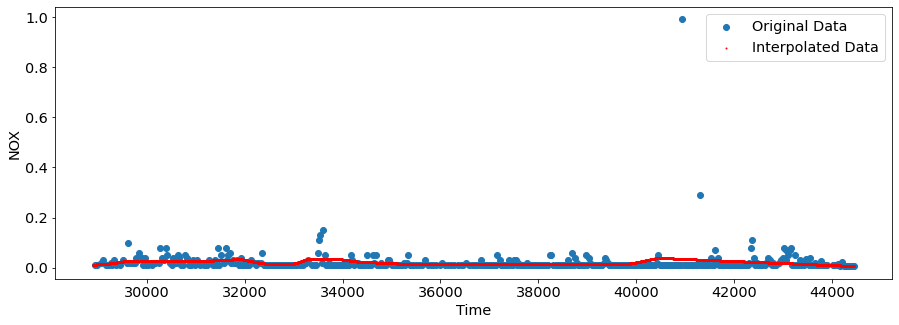

313/313 [==============================] - 0s 362us/step - loss: 1.7973e-18
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//NOX/saved_model/my_modelBB14_NOX')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/NOX_data/BB14.csv")
time = df['time'].values
NOX = df['NOX'].values
df

#Transform the normalized scale to real scale
NOX_min = 0.005
NOX_max = 0.99
time_min = 28933.58333                   
time_max = 44452.40972                       

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(NOX_max - NOX_min) + NOX_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, NOX*(NOX_max - NOX_min) + NOX_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('NOX')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [3]:
interpolation = model.predict([0.420999404
,0.424801238
,0.428731948
,0.432662657
,0.436593367
,0.440524077
,0.444519224
,0.448321058
,0.452251768
,0.456182477
,0.460113187
,0.464043897
,0.468039044
,0.471840878
,0.475771587
,0.479702297
,0.483633007
,0.487563716
,0.491558864
,0.495425136
,0.503286555
,0.511147974
,0.899450533
,0.966143721
,0.968076856
,0.97007443,
                               0.605291691


])
interpolation

array([[0.00954602],
       [0.00951818],
       [0.00948941],
       [0.00946063],
       [0.00943185],
       [0.00940307],
       [0.00936197],
       [0.00931994],
       [0.00927649],
       [0.00923303],
       [0.00918958],
       [0.00914612],
       [0.00910195],
       [0.00912286],
       [0.00919071],
       [0.00925856],
       [0.00932641],
       [0.00939426],
       [0.00946323],
       [0.00952996],
       [0.00966567],
       [0.00980137],
       [0.01438987],
       [0.00590137],
       [0.00565533],
       [0.00540107],
       [0.01122887]], dtype=float32)